In [1]:
import sys
sys.path.append('../src')
from cluster.feature_evaluator import FeatureEvaluator

In [2]:
import logging

# Suppress pymongo DEBUG messages
logging.getLogger('pymongo').setLevel(logging.WARNING)
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [16]:

profile_data = [{
#    "profile_id": "6701cbcfbed728701fa3b767",
    "profile_id": "670dc2bc76c58b6e8d51e858",
    "number": 20
}]

model_config = {
    "preprocess_config": "SMA",
    "normalization": "min_max",
    "action_space":
        {
            "type": "Discrete",
            "actions":
                {"1": "Buy",
                 "2": "Sell",
                 "0": "Hold"}
        }
    ,
    "state": {
        "klass": "SimplePosition"
    },
    "feature_vector_dim": 1,
    "feature_vector": [
        {
            "name": "SMADiff",
            "parameters": {
                "fast_period": 5,
                "slow_period": 20,
            },
        }
    ]
}




In [19]:
from data_streamer import DataStreamer
fe = FeatureEvaluator()
streamer = DataStreamer(profile_data, model_config)
streamer.connect_tool(fe)
streamer.run()


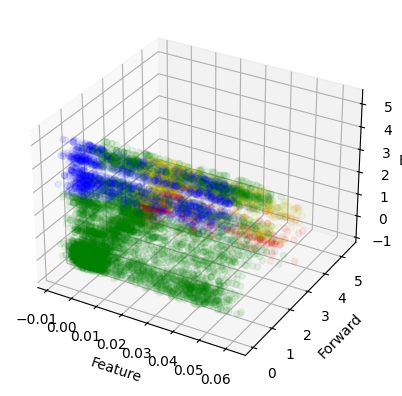

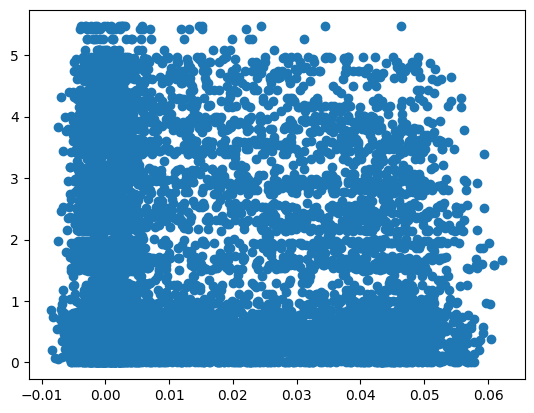

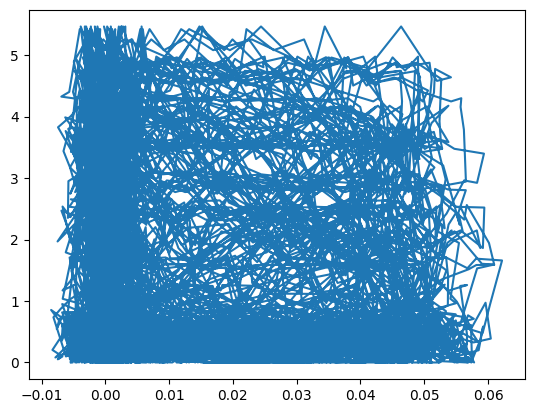

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample list of lists containing 3 numbers
data = fe.evaluation

# Extract the x, y, and z coordinates from the data
x = [point[0] for point in data]
y = [point[1] for point in data]
z = [point[2] for point in data]
colors = []
for y1, z1 in zip(y,z):
    if y1 > 3 and z1 < 0.01:
        colors.append('r')
    elif y1 > 3 and z1 < 2:
        colors.append('y')
    elif y1 < 1 and z1 > 3:
        colors.append('b')
    else:
        colors.append('g')
        
# colors = ['r' if y_val > 0.01 and z_val < 0.005 else 'b' for y_val, z_val in zip(y, z)]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z, c=colors, marker='o', alpha=0.07)

# Label the axes
ax.set_xlabel('Feature')
ax.set_ylabel('Forward')
ax.set_zlabel('Back')

# Show the plot
plt.show()


# plt.scatter(x,z, color='r')
plt.scatter(x, y)
plt.show()
plt.plot(x,y)

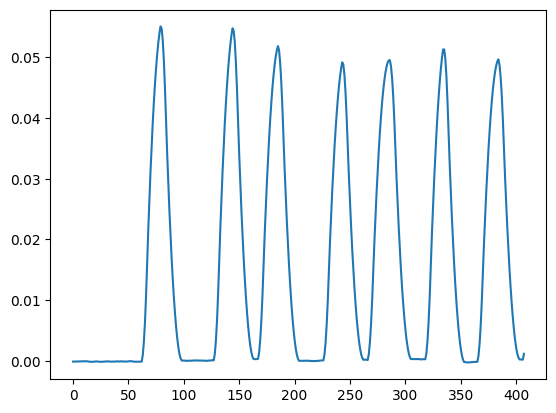

In [13]:
plt.plot(x)
plt.show()

In [8]:
len(data)

7040